Name: Ebrahim Hirani

UID: 2018130015

Batch: A

Objective:
To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dirct='/content/drive/MyDrive/DS/DailyDelhiClimateTrain.csv'

In [4]:
data=pd.read_csv(data_dirct)

data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [5]:
data["date"] = pd.to_datetime(data["date"])

In [6]:
data = data.set_index("date").asfreq('D')

In [7]:
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


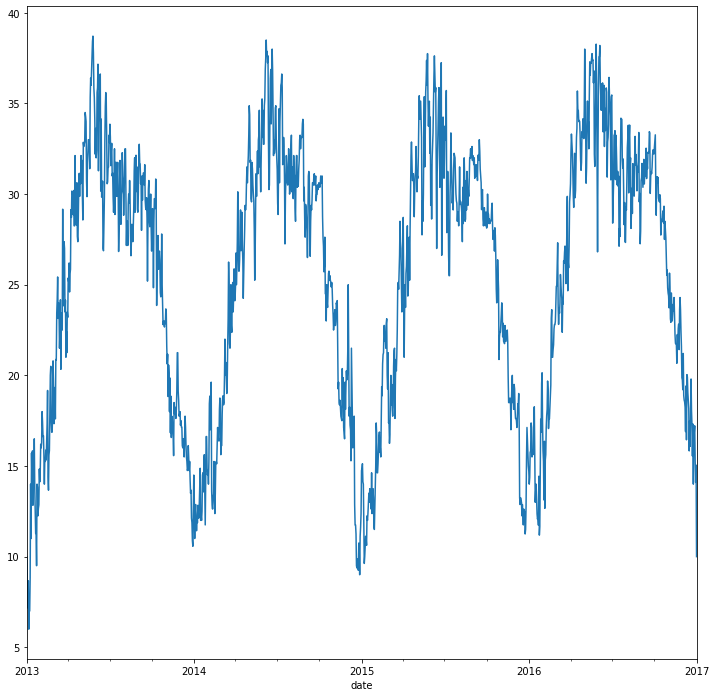

In [8]:
data = data["meantemp"]
data.plot(figsize=(12,12))

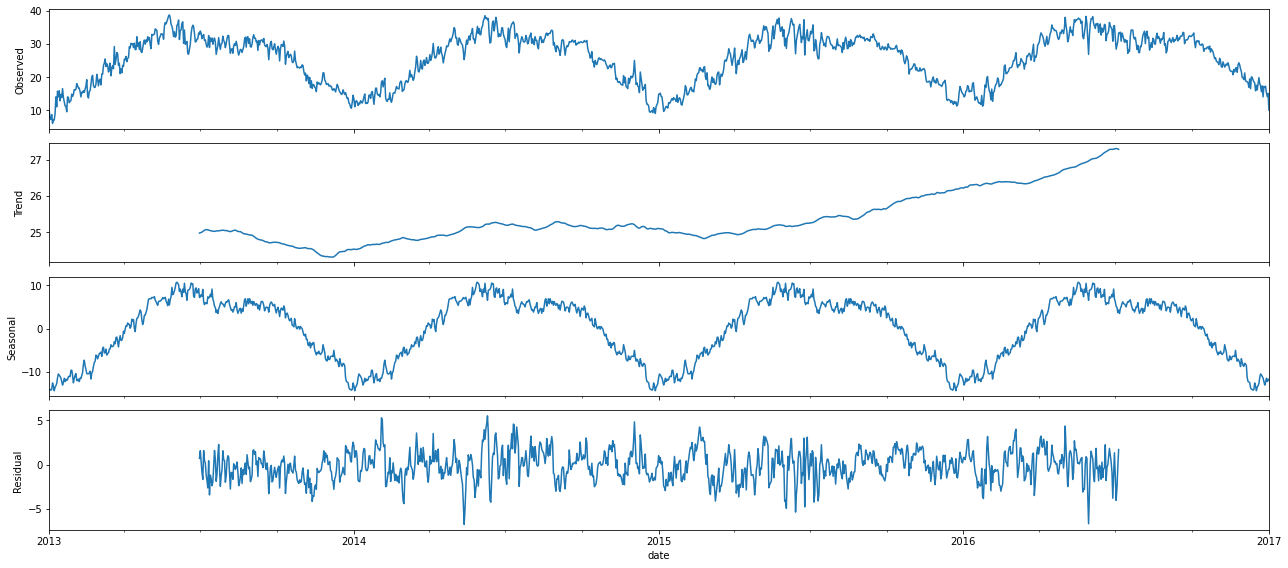

In [21]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize']=18,8
decompostion=sm.tsa.seasonal_decompose(data,freq = 360)
decompostion.plot()
plt.show()

The temperature dataset shows the seasonality as expected, showing high values during the middle of the year and decreasing during the end and beginning of the year.


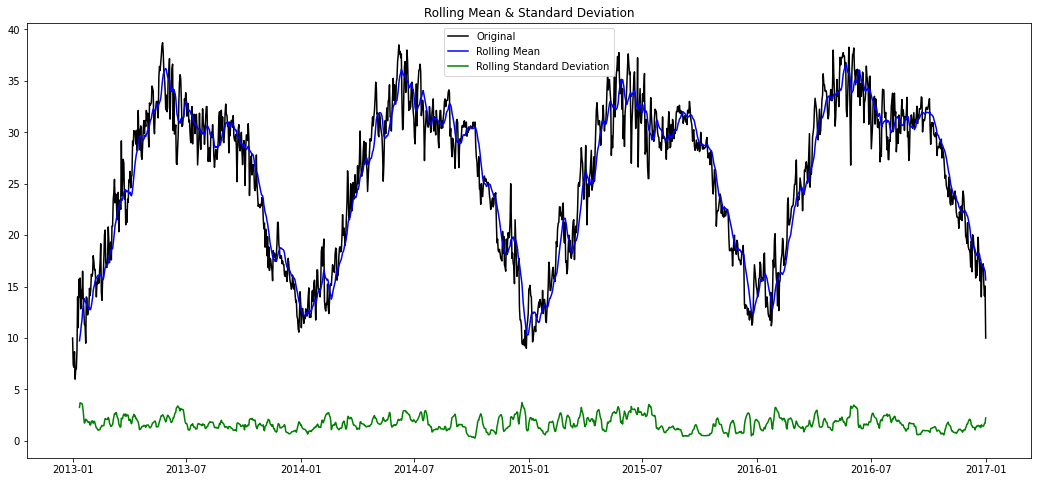

In [10]:
"""
    Graphical Representation of the Rolling Mean and Rolling Std. Deviation on the whole dataset
    This will some how help  in estimating the whether the dataset is Stationary or not.
"""
roll_mean=data.rolling(12).mean()
roll_std=data.rolling(12).std()
plt.plot(data, color='black',label='Original')
plt.plot(roll_mean,color="blue",label='Rolling Mean')
plt.plot(roll_std,color='green',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)



In [22]:
#Using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dickey_test(data):
    X_dickey=data.values
    result = adfuller(X_dickey)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
          print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]["5%"]:
      print ("Failed to reject Ho - Time Series is not Stationary")
    else:
      print ("Reject Ho - Time Series is Stationary")

In [14]:
dickey_test(data)

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


Here, ADF value is greater than the critical value
    SO NULL Hypothesis is accepted 
    i.e The Dataset is non-Stationary

ADF Statistic: -3.586512
p-value: 0.006024
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Stationary


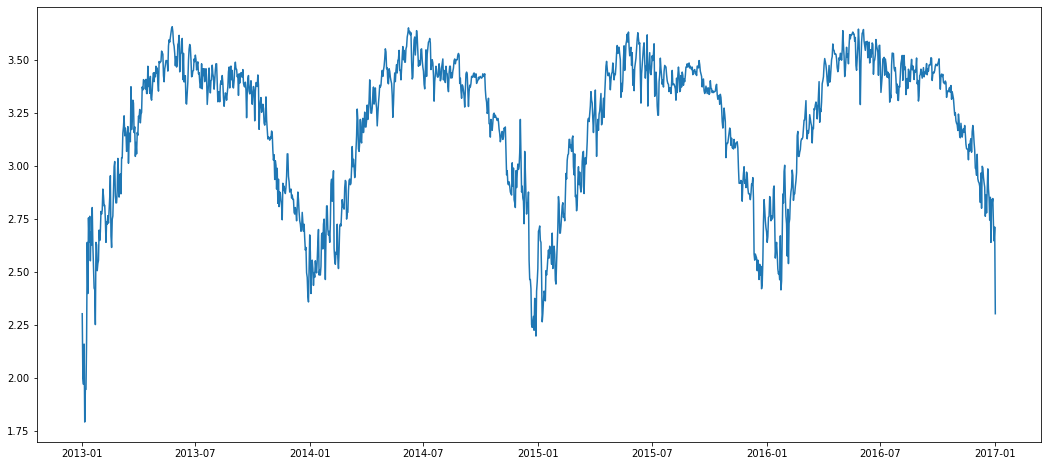

In [23]:
#Log Transforming the dataset to make it Stationary
import math
log_data=np.log(data)
    
dickey_test(log_data)
plt.plot(log_data)

Made dataset stationary by applying log transform


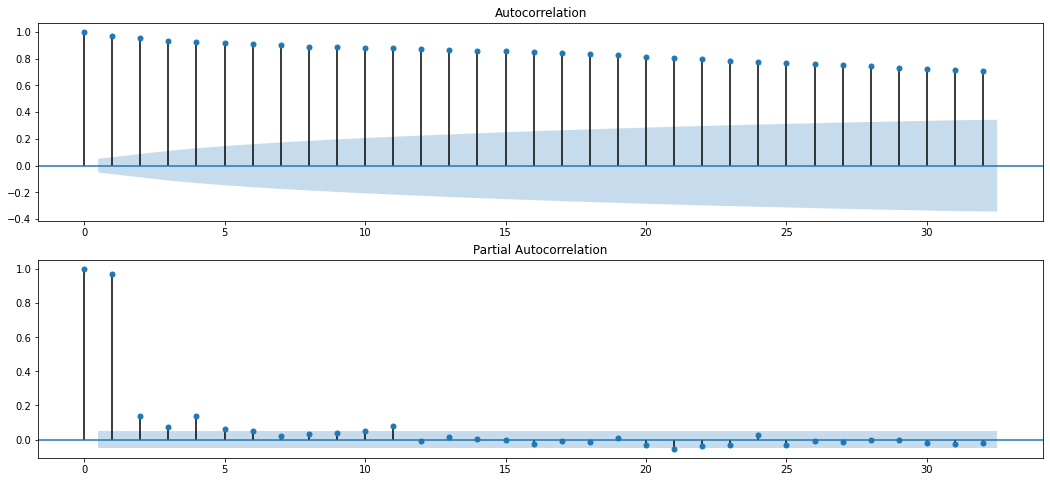

In [16]:
#Plotting the ACF and PACF graph 
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(data,  ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(data, ax=ax[1], method='ywm' )
plt.show()



The autocorrelation value decreases with increase in lag. As all lags are greater than the confidence interval, they are statistically significant.

The partial autocorrelation values are high in the first 2 lags but it drops significantly after that as the indirect correlations are removed in this method

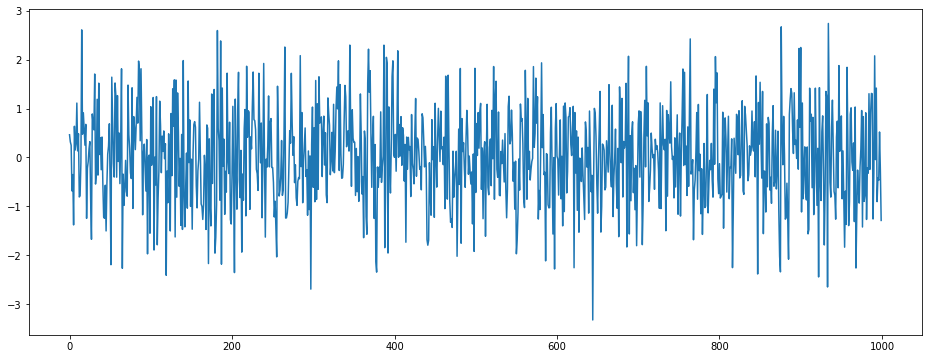

In [17]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

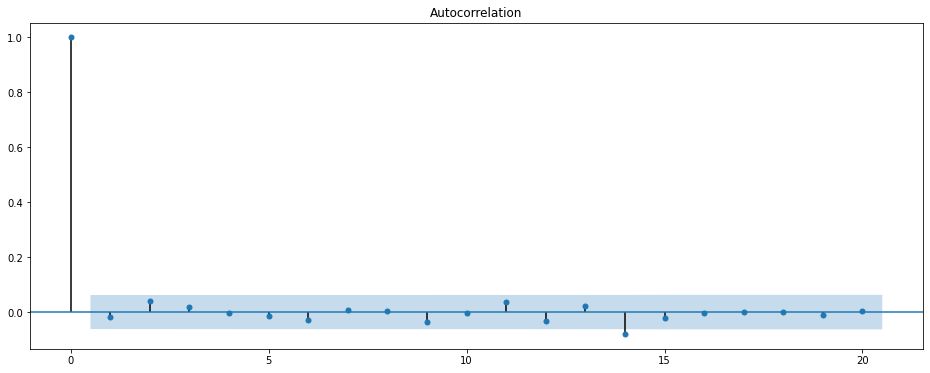

In [18]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(white_noise,lags=20)
plt.show()

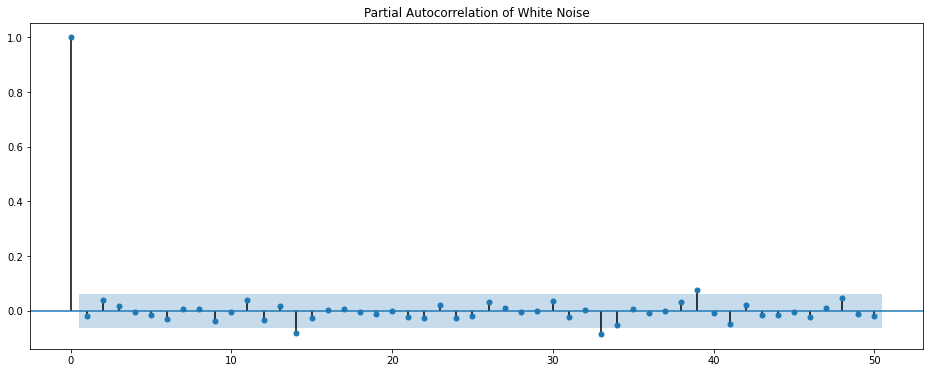

In [19]:
# Plotting partial autocorrelation of white noise
plot_pacf(white_noise,lags=50)
plt.title("Partial Autocorrelation of White Noise")
plt.show()

INFERENCE:
-The seasonality of the temperatures confirms the intuition of seasonal changes as expected.

-The increasing trend of temperature highlights the effect of climate change and global warming and is a worrying observation as it shows an average increase by almost 2 degrees

-The ADF test shows that the data is non-stationary, we make it stationary by applying log transform. This stationary augmentation of the data can be used for forcasting.

-The autocorrelation data suggests that it is statistically significant as the autocorrelation values lie outside of the confidence interval.